Question 1:

We have split our data to training and testing datasets with different ratios;
For ratios 60/40 and 70/30 with the increase of model complexity the model tends to overfit the training dataset. Considering relatively small sets of data for the model training can have a negative effect because in this case the contibution of 'outliers' (or some non-conventional data) can play significant role. The model perormance for 80/20 split looks the most reasonable. Taking 90/10 might be risky as it can mislead while estimating model performance on the test data. 

In general, for low model complexity training and testing performances tend to match as in this case underfitting takes places. For complex models they differ (accuracy is lower for testing sets) because there are too many parameters with which one can aplmost perfectly fit the model to the given training data set loosing at the same time accuracy for the test set (overfitting ).

With 10 neighbors KNeighbor Classifier is more complicated as it requires more parameters to fit. 

The range of n between 7 and 13 looks optimal as it enales to avoid both under and overfitting and reach a good value of accuracy. 



In [23]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

from sklearn.utils import check_random_state
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))


X_train9, X_test1, y_train9, y_test1 = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train8, X_test2, y_train8, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train7, X_test3, y_train7, y_test3 = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train6, X_test4, y_train6, y_test4 = train_test_split(X, y, test_size = 0.4, random_state = 0)


train_scores9 = []
test_scores9 = [] 

train_scores8 = []
test_scores8 = [] 

train_scores7 = []
test_scores7 = [] 

train_scores6 = []
test_scores6 = []

ks = np.arange(1, 21, 1)
for jj in ks:

    clf = KNeighborsClassifier(n_neighbors=jj)
    
    clf.fit(X_train9, y_train9)
    train_scores9.append(clf.score(X_train9, y_train9))
    test_scores9.append(clf.score(X_test1, y_test1))
    
    
    clf.fit(X_train8, y_train8)
    train_scores8.append(clf.score(X_train8, y_train8))
    test_scores8.append(clf.score(X_test2, y_test2))
    
    clf.fit(X_train7, y_train7)
    train_scores7.append(clf.score(X_train7, y_train7))
    test_scores7.append(clf.score(X_test3, y_test3))
    
    
    clf.fit(X_train6, y_train6)
    train_scores6.append(clf.score(X_train6, y_train6))
    test_scores6.append(clf.score(X_test4, y_test4));  


Plotting initial data:

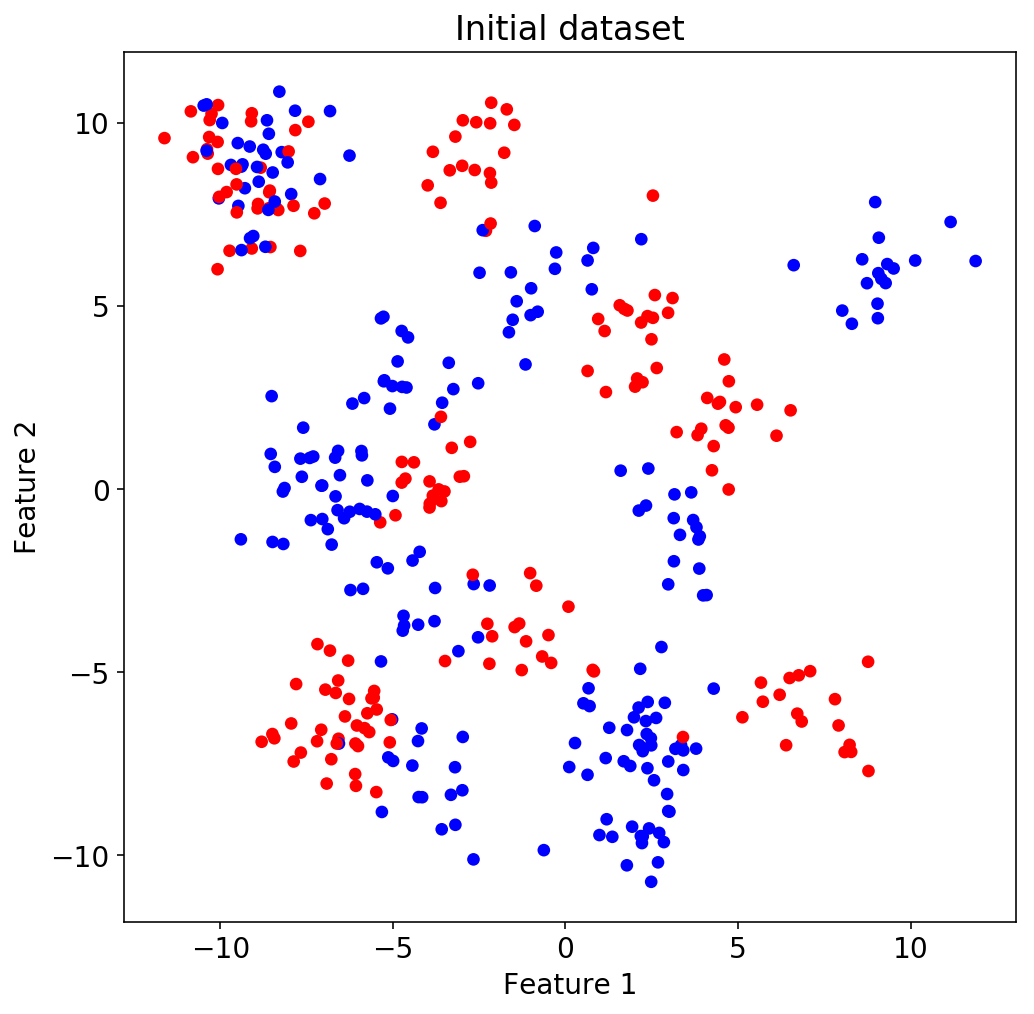

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Initial dataset')
plt.show()

Plotting accuracy as a function of n neighbors for different configuration of train-test data split

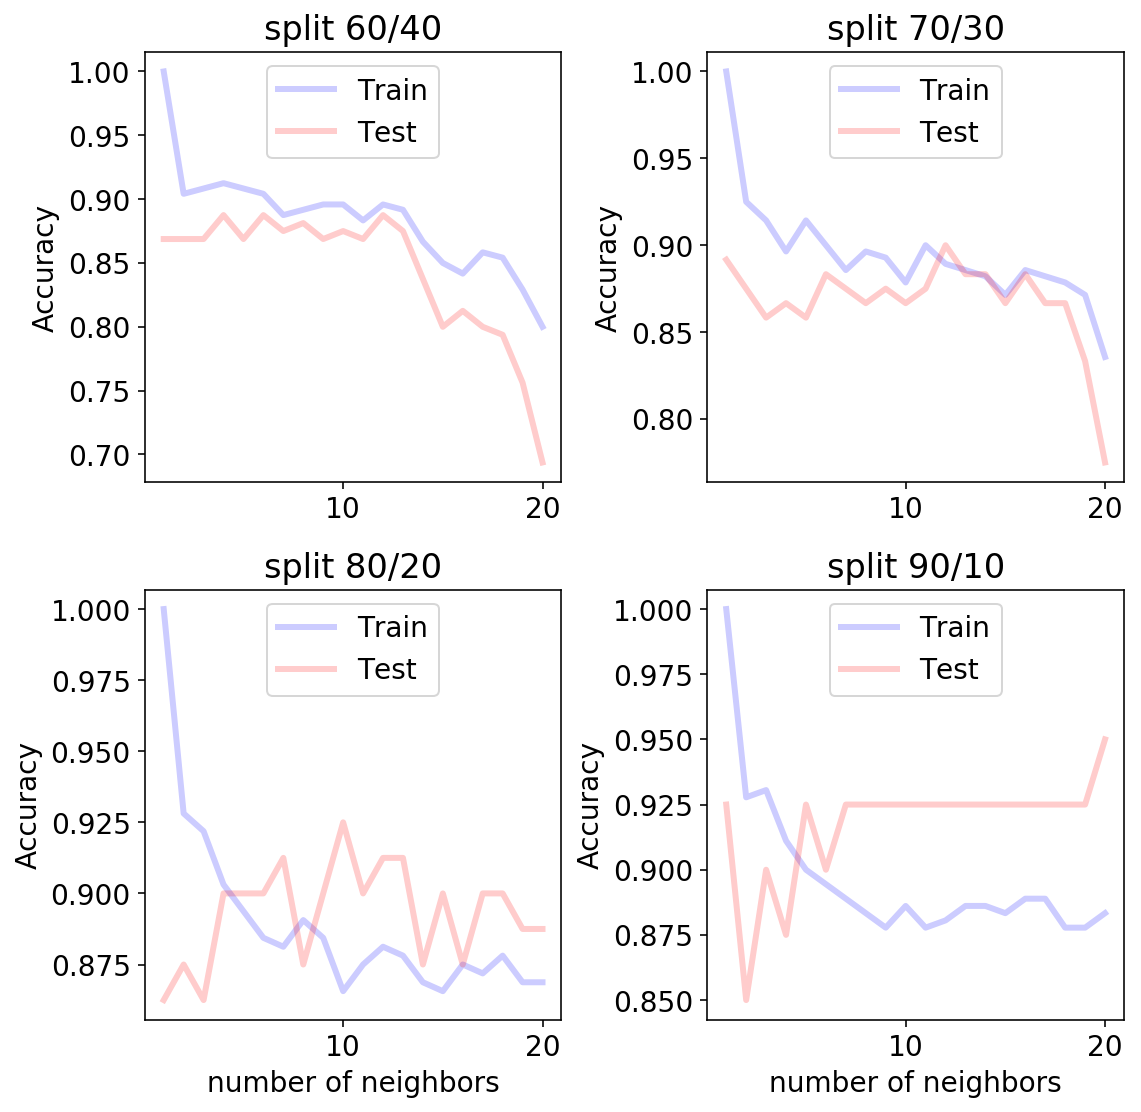

In [38]:

plt.figure(1)

plt.subplot(221)
plt.title('split 60/40')
#plt.xlabel("Feature 1")
plt.ylabel("Accuracy")
# plt.xlabel("number of neighbors")

plt.plot(ks, train_scores6, c='b', alpha=0.2, lw=3, label='Train')
plt.plot(ks, test_scores6, c='r', alpha=0.2, lw=3, label='Test')
plt.legend(loc='upper center')


plt.subplot(222)
plt.title('split 70/30')

plt.plot(ks, train_scores7, c='b', alpha=0.2, lw=3, label='Train')
plt.plot(ks, test_scores7, c='r', alpha=0.2, lw=3,  label='Test')
plt.legend(loc='upper center')


# plt.xlabel("number of neighbors")
plt.ylabel("Accuracy")


plt.subplot(223)
plt.title('split 80/20')
#plt.xlabel("Feature 1")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors")

plt.plot(ks, train_scores8, c='b', alpha=0.2, lw=3, label='Train')
plt.plot(ks, test_scores8, c='r', alpha=0.2, lw=3,  label='Test')
plt.legend(loc='upper center')

plt.subplot(224)
plt.title('split 90/10')

plt.plot(ks, train_scores9, c='b', alpha=0.2, lw=3,  label='Train')
plt.plot(ks, test_scores9, c='r', alpha=0.2, lw=3,  label='Test')
plt.legend(loc='upper center')


plt.xlabel("number of neighbors")
plt.ylabel("Accuracy")



plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


plt.show()

Question 2


The best interval of n values is between 7 and 12.
The trend in MSE graph observed for n= 5..15 is explained through similar under and overfitting trade-off. 

In [29]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.metrics import mean_squared_error


plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14


def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

X,y=make_regression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# plt.scatter(X_train,y_train)
# plt.scatter(X_test,y_test)


train_mse = []
test_mse = []
ks = np.arange(1, 21, 1)
for jj in ks:

    reg = KNeighborsRegressor(n_neighbors=jj)
    reg.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, reg.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, reg.predict(X_test)));





# plt.scatter(train_mse)
# plt.scatter(test_mse)


Initial dataset:

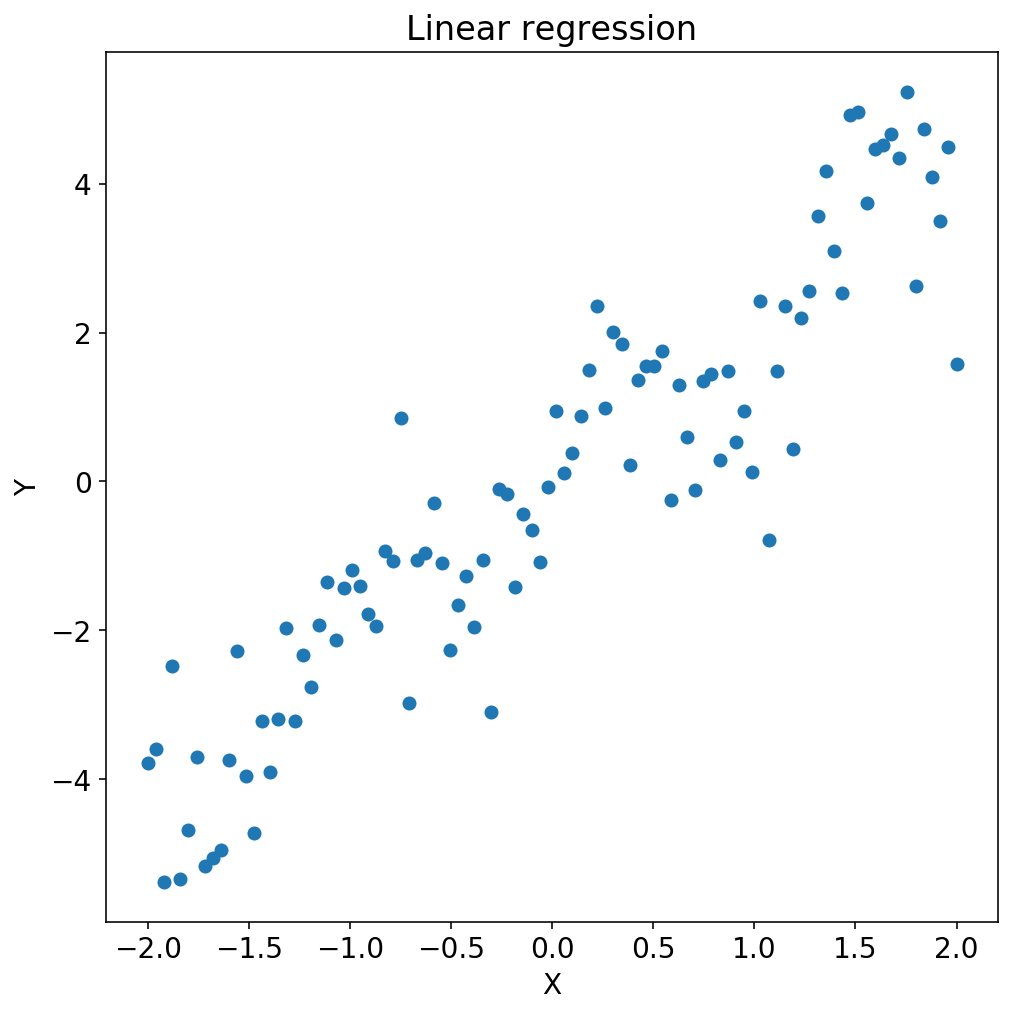

In [36]:
plt.scatter(X,y)
plt.title('Linear regression')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

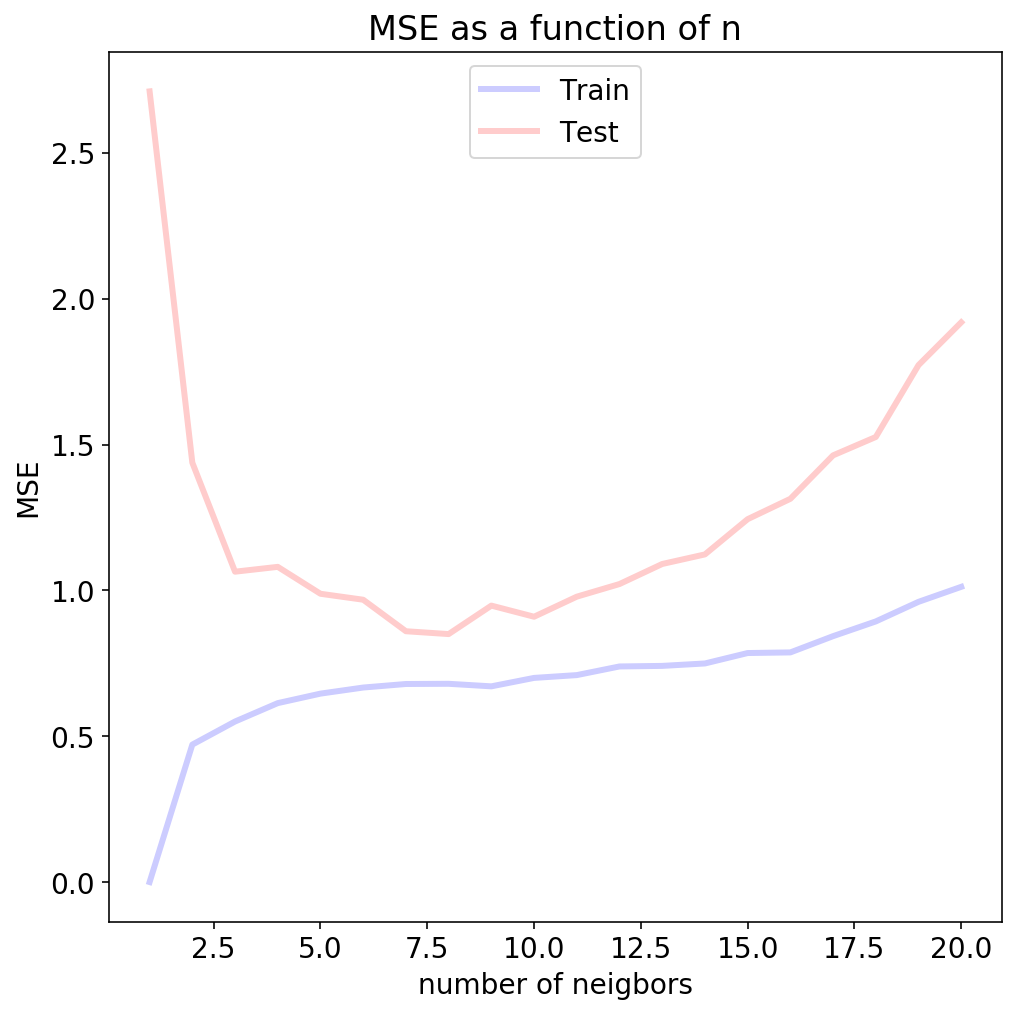

In [35]:
plt.plot(ks, train_mse, c='b', alpha=0.2, lw=3,label='Train')
plt.plot(ks, test_mse, c='r', alpha=0.2, lw=3,label='Test')
plt.title('MSE as a function of n')
plt.legend(loc='upper center')
plt.ylabel('MSE')
plt.xlabel('number of neigbors')

plt.show()


In [ ]:
# plt.scatter(X_train,y_train-reg.predict(X_train))

Question 3

To increase the model complexity one should use a polynomial based model to determine the decision boundary as in this case it is a second order curve (circle th0+th1*x1^2+th2*x2^2=radius^2). 
However, in this case we did not manage to find out how to modify the parameters of the model for LogisticRegression. 


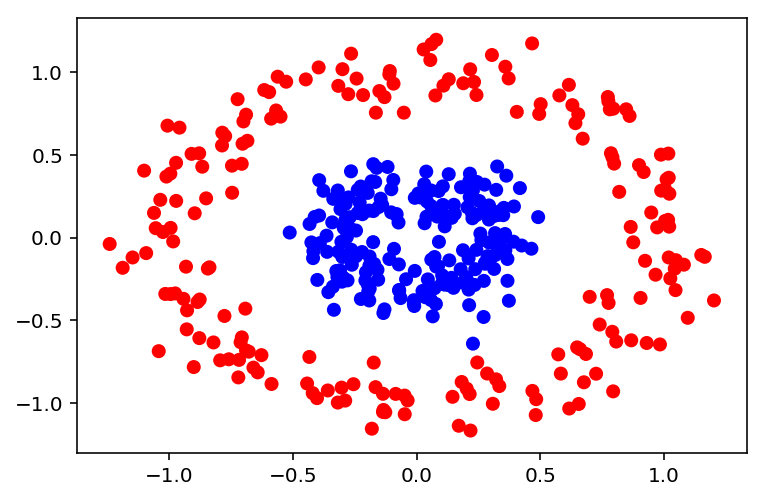

In [48]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
# np.random.seed(123)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.metrics import mean_squared_error

from sklearn.datasets import make_circles
X = []
y = []
X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))



plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# score = []
 
# ks = np.arange(1, 10, 1)
# for i in ks:
    
clf = LogisticRegression()
clf.fit(X, y)
clf.score(X, y);
#     score.append(clf.score(X, y));
   
    



In [49]:
clf.score(X, y)

0.5075